<a href="https://colab.research.google.com/github/adheeb4/MLNN-Project-Group-40/blob/main/Group_Project_Group_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Imports necessary libraries and modules for the code
import os
import numpy as np
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.activations import relu, sigmoid
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
#Mounts Google Drive to access the data.
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
#Specifies the paths for the training and validation data.
train_directory = "/content/gdrive/MyDrive/Group_Project_Data 2/Group_Project_Data/Train"
validation_directory = "/content/gdrive/MyDrive/Group_Project_Data 2/Group_Project_Data/Valid"

In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range =0.2, zoom_range = 0.2, horizontal_flip = True)
val_data_gen = ImageDataGenerator(rescale = 1./255)

In [6]:
#Creates image data generators for training with specified preprocessing options
train_gen = train_data_gen.flow_from_directory(
    train_directory,
    target_size = (64, 64),
    batch_size = 64,
    class_mode = "binary",
    color_mode = "grayscale",
    classes =["Real", "Fake"],
    shuffle=True,
    seed=42,
    subset = "training"
)

Found 6000 images belonging to 2 classes.


In [7]:
#Creates image data generators for validation with specified preprocessing options
val_gen = val_data_gen.flow_from_directory(
    validation_directory,
    target_size = (64, 64),
    batch_size = 64,
    class_mode = "binary",
    color_mode = "grayscale",
    classes =["Real", "Fake"],
    shuffle=False,
    seed=42,
)

Found 2000 images belonging to 2 classes.


In [8]:
#Creating a CNN model and printing the summary of the model
input_layer = Input((64, 64, 1), name="Input")

conv_1 = Conv2D(32, (3, 3), activation=relu, padding="same", name="conv_1")(input_layer)
conv_2 = Conv2D(32, (3, 3), activation=relu, padding="same", name="conv_2")(conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2),name="pool_1")(conv_2)
dropout1 = Dropout(0.2, name="dropout_1")(pool_1)

conv_3 = Conv2D(64, (3, 3), activation=relu, padding="same", name="conv_3")(dropout1)
conv_4 = Conv2D(64, (3, 3), activation=relu, padding="same", name="conv_4")(conv_3)
pool_2 = MaxPooling2D(pool_size=(2, 2),name="pool_2")(conv_4)
dropout_2 = Dropout(0.3, name="dropout_2")(pool_2)

conv_5 = Conv2D(128, (3, 3), activation=relu, padding="same", name="conv_5")(dropout_2)
conv_6 = Conv2D(128, (3, 3), activation=relu, padding="same", name="conv_6")(conv_5)
pool_3 = MaxPooling2D(pool_size=(2, 2),name="pool_3")(conv_6)
dropout_3 = Dropout(0.4, name="dropout_3")(pool_3)

flat = Flatten(name="flat")(pool_3)
fc_1 = Dense(units=512, activation=relu, name="fc_1")(flat)
dropout_4 = Dropout(0.5, name="dropout_4")(fc_1)

Output = Dense(units=1, activation=sigmoid, name="Output")(fc_1)

model = Model(inputs=input_layer, outputs=Output, name="Galaxies")
model.summary()

Model: "Galaxies"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 32)        9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 conv_4 (Conv2D)             (None, 32, 32, 64)        369

In [9]:
#Defines a function to reinitialize the model's weights.
def reinitialize(model):
    # Loop over the layers of the model
    for l in model.layers:
        # Check if the layer has initializers
        if hasattr(l,"kernel_initializer"):
            # Reset the kernel weights
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            # Reset the bias
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))

In [10]:
#Compiles the model with the Adam optimizer with default learning rate, binary cross-entropy loss function, and accuracy metric.
#reinitialize(model)
model.compile(optimizer=optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

In [11]:
#Trains the model using the fit method. It specifies the training and validation 
#generators, number of steps per epoch, number of epochs, 
#and early stopping callback. The training history is stored in the history variable.

Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_gen,
                    steps_per_epoch=train_gen.samples // train_gen.batch_size,
                    epochs=50,
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_gen.batch_size, callbacks=[Early_Stop])



Epoch 1/50
93/93 [==============================] - 3745s 40s/step - loss: 0.4788 - accuracy: 0.7001 - val_loss: 0.1002 - val_accuracy: 0.9713
Epoch 2/50
93/93 [==============================] - 18s 189ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 3/50
93/93 [==============================] - 15s 163ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 4/50
93/93 [==============================] - 15s 164ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 1.5774e-04 - val_accuracy: 1.0000
Epoch 5/50
93/93 [==============================] - 15s 166ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 8.8990e-04 - val_accuracy: 0.9995
Epoch 6/50
93/93 [==============================] - 17s 184ms/step - loss: 4.5172e-04 - accuracy: 0.9998 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 7/50
93/93 [==============================] - 18s 191ms/step - loss: 0.1675 - accuracy: 0.9685 - val_loss: 0.0019 - val_accu

In [18]:
#Evaluating the model
evaluation = model.evaluate(val_gen)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 [==============================] - 3s 92ms/step - loss: 0.0018 - accuracy: 0.9990
Validation Loss: 0.0018379177199676633
Validation Accuracy: 0.9990000128746033


In [19]:
#Saving the model
model.save('/content/Group_40_Model_Trained')

In [20]:
#Testing saved model
loaded_model = tf.keras.models.load_model('/content/Group_40_Model_Trained')
loaded_model.summary()

Model: "Galaxies"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 32)        9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 conv_4 (Conv2D)             (None, 32, 32, 64)        369

In [21]:
#zipping the model
!zip -r /content/Group_40_Model_Trained.zip /content/Group_40_Model_Trained

updating: content/Group_40_Model_Trained/ (stored 0%)
updating: content/Group_40_Model_Trained/keras_metadata.pb (deflated 93%)
updating: content/Group_40_Model_Trained/variables/ (stored 0%)
updating: content/Group_40_Model_Trained/variables/variables.index (deflated 67%)
updating: content/Group_40_Model_Trained/variables/variables.data-00000-of-00001 (deflated 8%)
updating: content/Group_40_Model_Trained/fingerprint.pb (stored 0%)
updating: content/Group_40_Model_Trained/assets/ (stored 0%)
updating: content/Group_40_Model_Trained/saved_model.pb (deflated 89%)


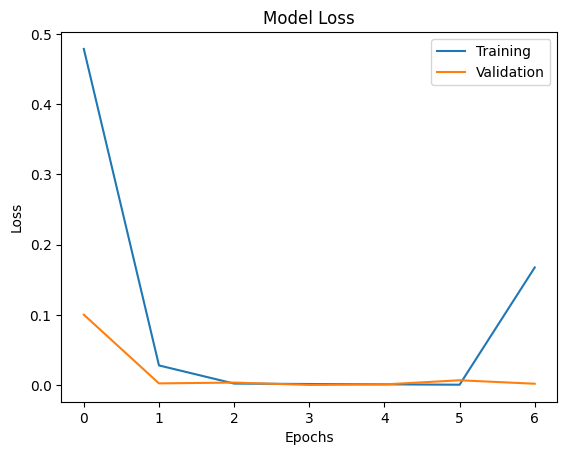

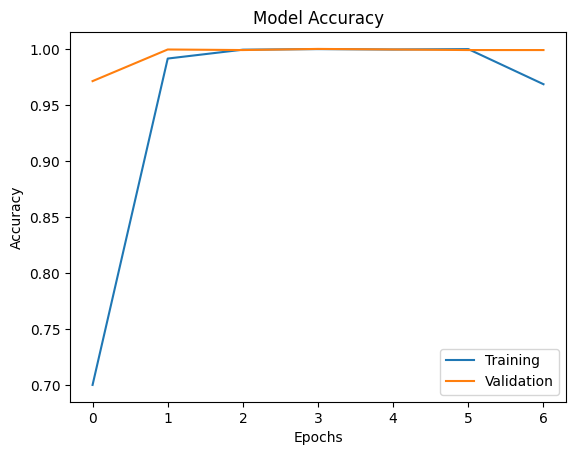

In [22]:
#Plotting the Loss and Accuracy for the model
plt.figure()

plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.title("Model Loss")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.title("Model Accuracy")


plt.show()


2/2 [==============================] - 0s 8ms/step


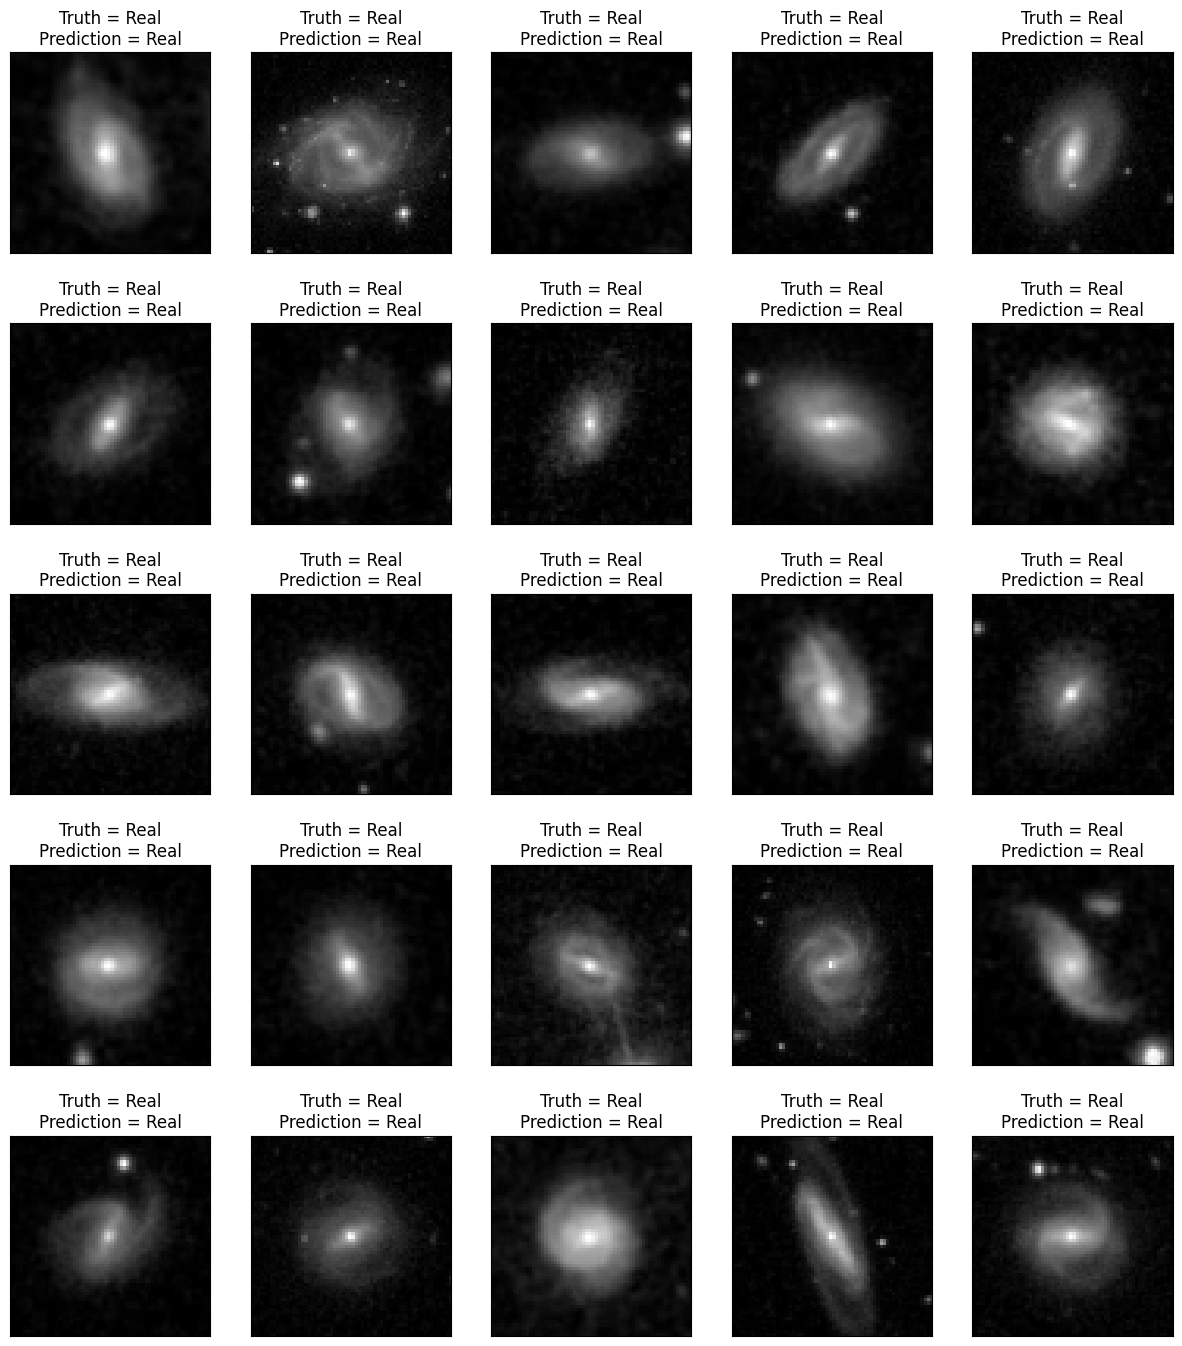

In [23]:
#Generates predictions for a batch of validation images and displays a 
#grid of 25 images along with their true and predicted labels.

class_names = list(val_gen.class_indices.keys())
x_val, y_val = next(val_gen)
y_pred = model.predict(x_val)
y_pred_label = np.argmax(y_pred, axis=1)




y_pred = model.predict(x_val)
threshold = 0.5
y_pred_label = np.where(y_pred >= threshold, 1, 0)



f, ax = plt.subplots(5, 5, figsize=(15, 17))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_val[i, :, :, 0], cmap='gray')
    ax[i].set_title(f'Truth = {class_names[int(y_val[i])]}\nPrediction = {class_names[int(y_pred_label[i])]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()